### Legend for accidents data columns description

http://data.vicroads.vic.gov.au/metadata/Attribute_Table_Viewlist_7ac33a09.asp.html

### Data cleaning process

In [1]:
import pandas as pd
import datetime as dt
from datetime import date
import calendar


In [2]:
path = 'raw_data/road_crashes.csv'
crashes = pd.read_csv(path)
# rename CSV File
crashes.shape

(77513, 65)

In [3]:
# Removed these columns as the information they contained were not needed.

# store not needed columns in a list
removed_columns = ["X","Y","NODE_ID","NODE_TYPE",'VICGRID_X', 'VICGRID_Y','INJ_OR_FATAL','SRNS','SRNS_ALL']

# drop the columns from the data frame
clean_crashes = crashes.drop(removed_columns,axis =1)

clean_crashes.head()
# node_id was assumed to be location of a particular node, it was removed as we have latitude and longtidue.

# node type removed as road geomtry gave us the same info

# removed inj or fatal column as we have columns for injurys,fatals etc already

# removed SRNS and SRNS_ALL as more than 50% of the column data was missing


,OBJECTID,ACCIDENT_NO,ABS_CODE,ACCIDENT_STATUS,ACCIDENT_DATE,ACCIDENT_TIME,ALCOHOLTIME,ACCIDENT_TYPE,DAY_OF_WEEK,DCA_CODE,...,PUBLICVEHICLE,DEG_URBAN_NAME,DEG_URBAN_ALL,LGA_NAME_ALL,REGION_NAME_ALL,RMA,RMA_ALL,DIVIDED,DIVIDED_ALL,STAT_DIV_NAME
0,1,T20140013514,ABS to receive accident,Unfinished,2014/07/01,13:09:00,No,Collision with vehicle,Monday,RIGHT THROUGH,...,0.0,TOWNS,TOWNS,MITCHELL,NORTHERN REGION,Arterial Highway,"Local Road,Arterial Highway",Undivided,Undivided,Country
1,2,T20140013549,ABS to receive accident,Finished,2014/07/02,00:01:00,Yes,Collision with vehicle,Wednesday,U TURN,...,0.0,MELB_URBAN,MELB_URBAN,WHITTLESEA,METROPOLITAN NORTH WEST REGION,Arterial Other,Arterial Other,Undivided,Undivided,Metro
2,3,T20140013561,ABS to receive accident,Finished,2014/07/02,08:30:00,No,collision with some other object,Wednesday,STRUCK OBJECT ON CARRIAGEWAY,...,0.0,MELB_URBAN,MELB_URBAN,KNOX,METROPOLITAN SOUTH EAST REGION,Local Road,Local Road,Undivided,Undivided,Metro
3,4,T20140013563,ABS to receive accident,Finished,2014/07/02,10:08:00,No,Collision with vehicle,Wednesday,CROSS TRAFFIC(INTERSECTIONS ONLY),...,0.0,MELB_URBAN,MELB_URBAN,WYNDHAM,METROPOLITAN NORTH WEST REGION,Arterial Other,"Arterial Other,Local Road",Divided,"Undivided,Divided",Metro
4,5,T20140013567,ABS to receive accident,Finished,2014/07/02,09:12:00,No,Collision with vehicle,Wednesday,RIGHT THROUGH,...,0.0,MELB_URBAN,MELB_URBAN,WYNDHAM,METROPOLITAN NORTH WEST REGION,Arterial Other,"Arterial Other,Local Road",Undivided,Undivided,Metro


In [4]:
clean_crashes["PED_CYCLIST_5_12"].value_counts()

# rename columns so they make more sense/easier to read/type

0.0    76824
1.0      661
2.0       22
3.0        4
8.0        1
Name: PED_CYCLIST_5_12, dtype: int64

In [5]:
clean_crashes["ABS_CODE"].value_counts()

ABS to receive accident                   72307
Non ABS accident                           4968
Heart attk/suicide/death by nat.causes      238
Name: ABS_CODE, dtype: int64

In [6]:
#Replace values inside 
clean_crashes["ABS_CODE"] = clean_crashes["ABS_CODE"].replace({"ABS to receive accident":"Driving accident",
                                       "Non ABS accident": "Driving accident",
                                       "Heart attk/suicide/death by nat.causes": "Death before accident"})
clean_crashes["ABS_CODE"].value_counts()

Driving accident         77275
Death before accident      238
Name: ABS_CODE, dtype: int64

### Dealing with NA values

In [7]:
# check how many NA values each column has
clean_crashes.isna().sum()

OBJECTID                0
ACCIDENT_NO             0
ABS_CODE                0
ACCIDENT_STATUS         0
ACCIDENT_DATE           0
ACCIDENT_TIME           0
ALCOHOLTIME             0
ACCIDENT_TYPE           0
DAY_OF_WEEK          2360
DCA_CODE                0
HIT_RUN_FLAG            0
LIGHT_CONDITION         0
POLICE_ATTEND           0
ROAD_GEOMETRY           0
SEVERITY                1
SPEED_ZONE              0
RUN_OFFROAD             0
LONGITUDE            1106
LATITUDE             1106
LGA_NAME                0
REGION_NAME             0
TOTAL_PERSONS           1
FATALITY                1
SERIOUSINJURY           1
OTHERINJURY             1
NONINJURED              1
MALES                   1
FEMALES                 1
BICYCLIST               1
PASSENGER               1
DRIVER                  1
PEDESTRIAN              1
PILLION                 1
MOTORIST                1
UNKNOWN                 1
PED_CYCLIST_5_12        1
PED_CYCLIST_13_18       1
OLD_PEDESTRIAN          1
OLD_DRIVER  

In [8]:
# check where long/lat is NA
clean_crashes[clean_crashes["LONGITUDE"].isna()].head()
clean_crashes[clean_crashes["LATITUDE"].isna()].head()

,OBJECTID,ACCIDENT_NO,ABS_CODE,ACCIDENT_STATUS,ACCIDENT_DATE,ACCIDENT_TIME,ALCOHOLTIME,ACCIDENT_TYPE,DAY_OF_WEEK,DCA_CODE,...,PUBLICVEHICLE,DEG_URBAN_NAME,DEG_URBAN_ALL,LGA_NAME_ALL,REGION_NAME_ALL,RMA,RMA_ALL,DIVIDED,DIVIDED_ALL,STAT_DIV_NAME
2,3,T20140013561,Driving accident,Finished,2014/07/02,08:30:00,No,collision with some other object,Wednesday,STRUCK OBJECT ON CARRIAGEWAY,...,0.0,MELB_URBAN,MELB_URBAN,KNOX,METROPOLITAN SOUTH EAST REGION,Local Road,Local Road,Undivided,Undivided,Metro
9,10,T20140013589,Driving accident,Finished,2014/07/01,18:00:00,Yes,Collision with vehicle,Tuesday,LANE CHANGE LEFT (NOT OVERTAKING),...,0.0,MELB_URBAN,MELB_URBAN,HOBSONS BAY,METROPOLITAN NORTH WEST REGION,Freeway,Freeway,Divided,Divided,Metro
16,17,T20140013619,Driving accident,Finished,2014/07/02,18:00:00,Yes,Collision with vehicle,Wednesday,OTHER MANOEUVRING NOT INCLUDED IN DCAs 140-148,...,0.0,LARGE_PROVINCIAL_CITIES,LARGE_PROVINCIAL_CITIES,BENDIGO,NORTHERN REGION,NaN,NaN,NaN,NaN,Country
19,20,T20140013508,Driving accident,Finished,2014/07/01,06:50:00,No,Collision with vehicle,Tuesday,RIGHT NEAR (INTERSECTIONS ONLY),...,0.0,MELB_URBAN,MELB_URBAN,KNOX,METROPOLITAN SOUTH EAST REGION,Arterial Other,"Arterial Other,Local Road",Undivided,Undivided,Metro
23,24,T20140013599,Driving accident,Finished,2014/07/02,15:41:00,No,Collision with a fixed object,Wednesday,LEFT OFF CARRIAGEWAY INTO OBJECT/PARKED VEHICLE,...,0.0,MELB_URBAN,MELB_URBAN,KNOX,METROPOLITAN SOUTH EAST REGION,Local Road,Local Road,Undivided,Undivided,Metro


In [9]:
clean_crashes['RMA'].unique()

array(['Arterial Highway', 'Arterial Other', 'Local Road', 'Freeway', nan,
       'Non Arterial'], dtype=object)

In [13]:
# first change DAY_OF_WEEK NAN
# index of missing day of week values
missing_dow = clean_crashes.index[clean_crashes["DAY_OF_WEEK"].isna()]

for index in missing_dow.tolist():
    clean_crashes.iloc[index,8] = pd.to_datetime(clean_crashes.iloc[index,4]).day_name()

# check if NA have been removed
clean_crashes["DAY_OF_WEEK"].value_counts()

# No Nan Values left at DAY_OF_WEEK column

# For missing lat/long data, either search for lat/long of the place where the accident occured, or remove (depending on row)

# Remove rows that have less than 6 na values after we figure out what to do with columns with high Nan count

# Remove these rows as they have extremly high amount of NA's
remove_col = ["RMA_ALL","DIVIDED","DIVIDED_ALL"]
clean_crashes = clean_crashes.drop(remove_col,axis =1)

# Remove only Nan RMA values, as we need the other values
# remove lat,long values that have NA
clean_crashes = clean_crashes.dropna()


# check if all na values are gone
clean_crashes.isna().sum()

clean_crashes.to_csv('cleaned_data/all_crashes.csv')


In [15]:
clean_crashes['RMA'].unique()

array(['Arterial Highway', 'Arterial Other', 'Local Road', 'Freeway',
       'Non Arterial'], dtype=object)

### Check variable types

In [16]:
# Check data characteristics (ensure that numeric columns are integer - they are, so no change required)
clean_crashes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71003 entries, 0 to 77512
Data columns (total 53 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   OBJECTID           71003 non-null  int64  
 1   ACCIDENT_NO        71003 non-null  object 
 2   ABS_CODE           71003 non-null  object 
 3   ACCIDENT_STATUS    71003 non-null  object 
 4   ACCIDENT_DATE      71003 non-null  object 
 5   ACCIDENT_TIME      71003 non-null  object 
 6   ALCOHOLTIME        71003 non-null  object 
 7   ACCIDENT_TYPE      71003 non-null  object 
 8   DAY_OF_WEEK        71003 non-null  object 
 9   DCA_CODE           71003 non-null  object 
 10  HIT_RUN_FLAG       71003 non-null  object 
 11  LIGHT_CONDITION    71003 non-null  object 
 12  POLICE_ATTEND      71003 non-null  object 
 13  ROAD_GEOMETRY      71003 non-null  object 
 14  SEVERITY           71003 non-null  object 
 15  SPEED_ZONE         71003 non-null  object 
 16  RUN_OFFROAD        710

### Sepearte by LGA Name

In [17]:
# filter for melbourne only
melbourne_data = clean_crashes[clean_crashes["LGA_NAME"] == "MELBOURNE"]
melbourne_data.to_csv('cleaned_data/melbourne_data.csv')

# filter for hume only
hume_data = clean_crashes[clean_crashes["LGA_NAME"] == "HUME"]
hume_data.to_csv('cleaned_data/hume_data.csv')

### Looking at the data and seeing if we can find anything interesting

In [18]:
# see places with the most accidents
clean_crashes["LGA_NAME"].value_counts()

MELBOURNE           3897
CASEY               3000
GEELONG             2815
DANDENONG           2395
HUME                2298
                    ... 
(FALLS CREEK)         11
(MOUNT BAW BAW)        4
(FRENCH ISLAND)        1
(MOUNT STIRLING)       1
                       1
Name: LGA_NAME, Length: 87, dtype: int64

In [19]:
# see accident type and its counts
clean_crashes["ACCIDENT_TYPE"].value_counts()

Collision with vehicle               45507
Collision with a fixed object        11297
Struck Pedestrian                     6055
Vehicle overturned (no collision)     3311
No collision and no object struck     3016
Struck animal                          711
collision with some other object       647
Fall from or in moving vehicle         407
Other accident                          52
Name: ACCIDENT_TYPE, dtype: int64

<AxesSubplot:title={'center':'FATALITY'}, xlabel='ACCIDENT_TYPE'>

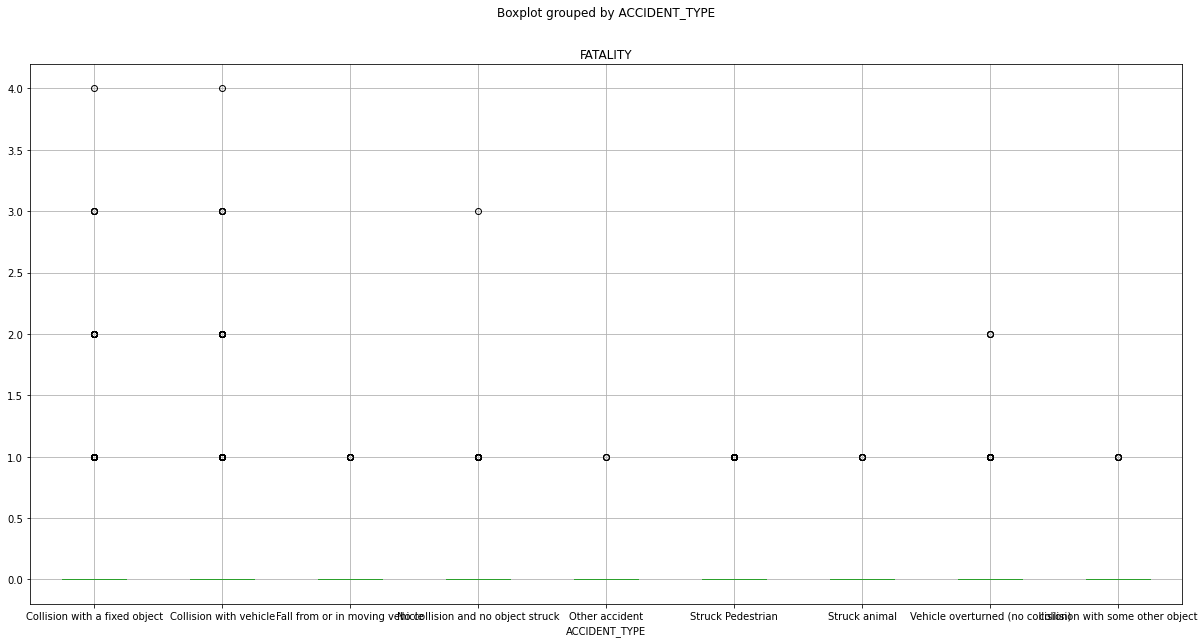

In [20]:
clean_crashes.boxplot("FATALITY", by="ACCIDENT_TYPE", figsize=(20, 10))

### Notes

In [15]:
## Bar Graphs
# accident counts per region
# accident types

In [16]:
# retrieved from:
# vic roads
# bom
# google api
# downloaded csv files/used api


In [17]:
# NOTE: see what weather data affects and then decide if we remove any of the remaining columns if they are not needed
